In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from warnings import filterwarnings
from statsmodels.stats.multicomp import pairwise_tukeyhsd
filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (15,8)

In [2]:
data = pd.read_csv("HeartDisease.csv")

In [3]:
data.sample(10)

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
203,68,1,2,180,274,1,0,150,1,1.6,1,0,3,0
67,45,0,1,130,234,0,0,175,0,0.6,1,0,2,1
152,64,1,3,170,227,0,0,155,0,0.6,1,0,3,1
123,54,0,2,108,267,0,0,167,0,0.0,2,0,2,1
31,65,1,0,120,177,0,1,140,0,0.4,2,0,3,1
165,67,1,0,160,286,0,0,108,1,1.5,1,3,2,0
229,64,1,2,125,309,0,1,131,1,1.8,1,0,3,0
195,59,1,0,170,326,0,0,140,1,3.4,0,0,3,0
157,35,1,1,122,192,0,1,174,0,0.0,2,0,2,1
53,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  303 non-null    int64  
 1   gender               303 non-null    int64  
 2   chest_pain           303 non-null    int64  
 3   rest_bps             303 non-null    int64  
 4   cholestrol           303 non-null    int64  
 5   fasting_blood_sugar  303 non-null    int64  
 6   rest_ecg             303 non-null    int64  
 7   thalach              303 non-null    int64  
 8   exer_angina          303 non-null    int64  
 9   old_peak             303 non-null    float64
 10  slope                303 non-null    int64  
 11  ca                   303 non-null    int64  
 12  thalassemia          303 non-null    int64  
 13  target               303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
data.isnull().sum()

age                    0
gender                 0
chest_pain             0
rest_bps               0
cholestrol             0
fasting_blood_sugar    0
rest_ecg               0
thalach                0
exer_angina            0
old_peak               0
slope                  0
ca                     0
thalassemia            0
target                 0
dtype: int64

In [6]:
data.describe()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# age

In [7]:
data.age.value_counts()

58    19
57    17
54    16
59    14
52    13
51    12
62    11
60    11
44    11
56    11
41    10
64    10
63     9
67     9
65     8
55     8
61     8
53     8
45     8
43     8
42     8
50     7
66     7
48     7
46     7
49     5
47     5
70     4
39     4
68     4
35     4
69     3
40     3
38     3
71     3
37     2
34     2
76     1
29     1
74     1
77     1
Name: age, dtype: int64

In [8]:
data.age.describe()

count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

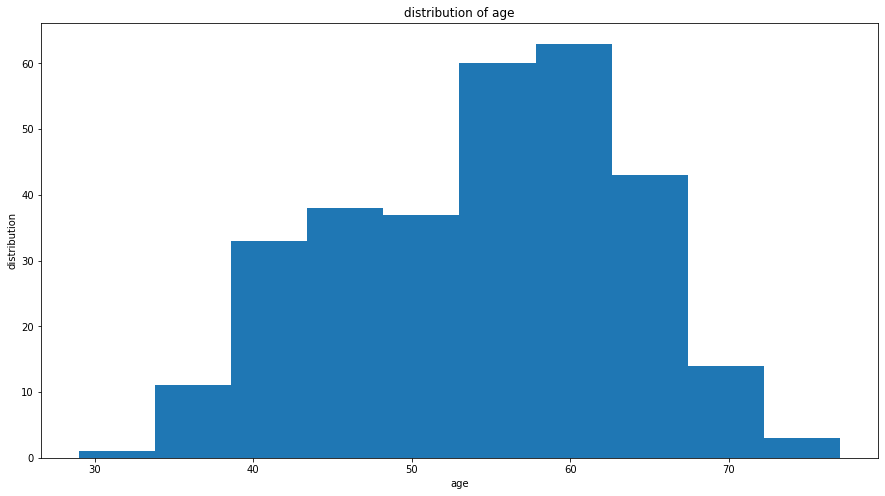

In [9]:
plt.hist(data.age)
plt.title("distribution of age")
plt.xlabel("age")
plt.ylabel("distribution")
plt.show()

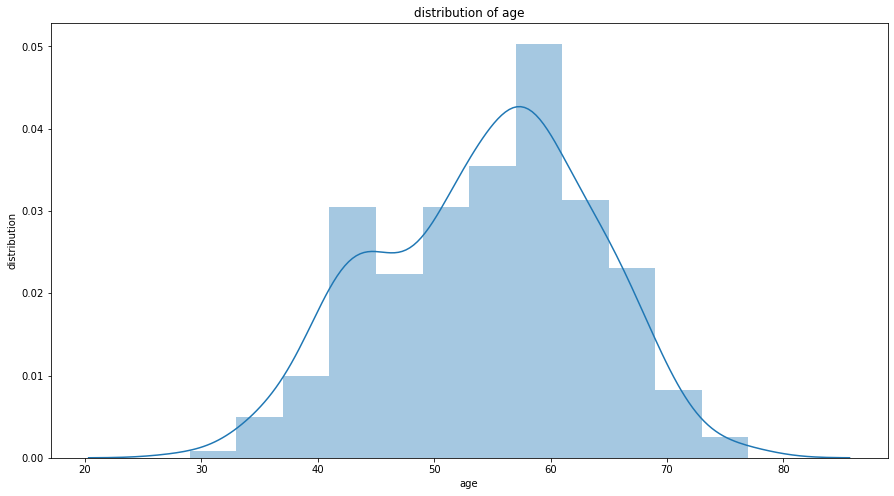

In [10]:
sns.distplot(data.age)
plt.title("distribution of age")
plt.xlabel("age")
plt.ylabel("distribution")
plt.show()

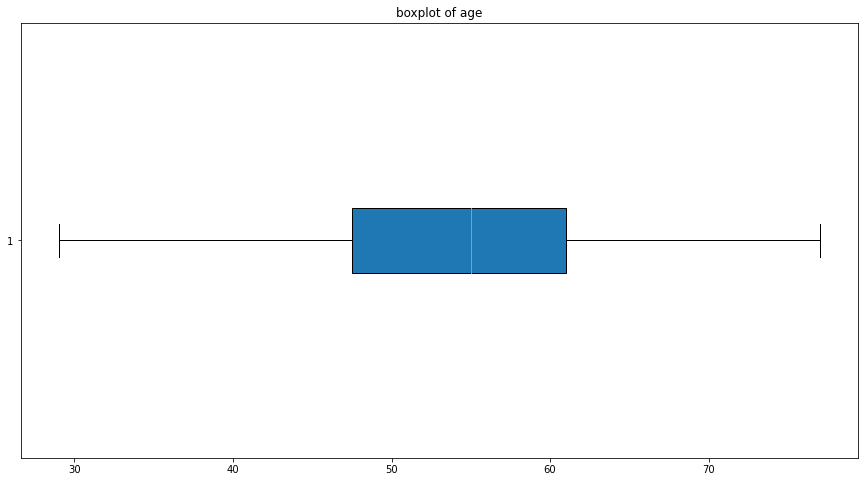

In [11]:
plt.boxplot(data.age, vert = False,patch_artist = True)
plt.title("boxplot of age")
plt.show()

In [12]:
data.groupby("age")["target"].describe()

,count,mean,std,min,25%,50%,75%,max
age,,,,,,,,
29,1.0,1.000000,NaN,1.0,1.00,1.0,1.00,1.0
34,2.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
35,4.0,0.500000,0.577350,0.0,0.00,0.5,1.00,1.0
37,2.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
38,3.0,0.666667,0.577350,0.0,0.50,1.0,1.00,1.0
39,4.0,0.750000,0.500000,0.0,0.75,1.0,1.00,1.0
40,3.0,0.333333,0.577350,0.0,0.00,0.0,0.50,1.0
41,10.0,0.900000,0.316228,0.0,1.00,1.0,1.00,1.0
42,8.0,0.875000,0.353553,0.0,1.00,1.0,1.00,1.0


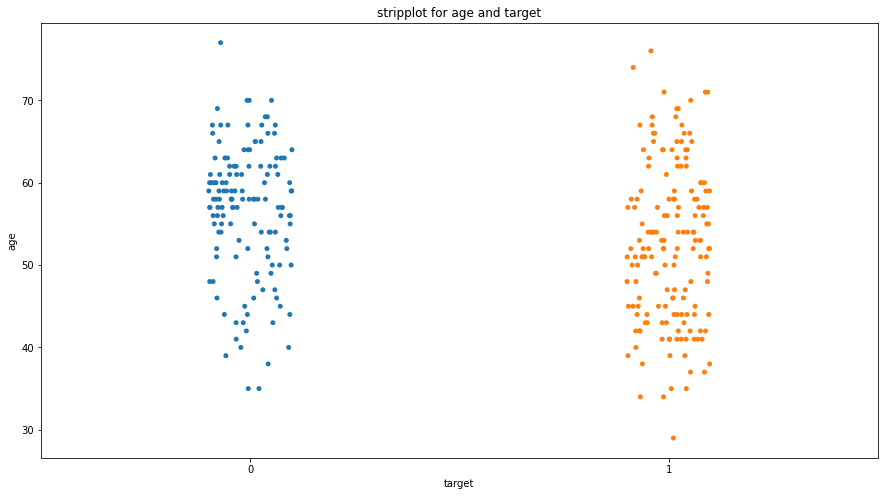

In [13]:
sns.stripplot(x = "target", y = "age",data = data)
plt.title("stripplot for age and target")
plt.show()

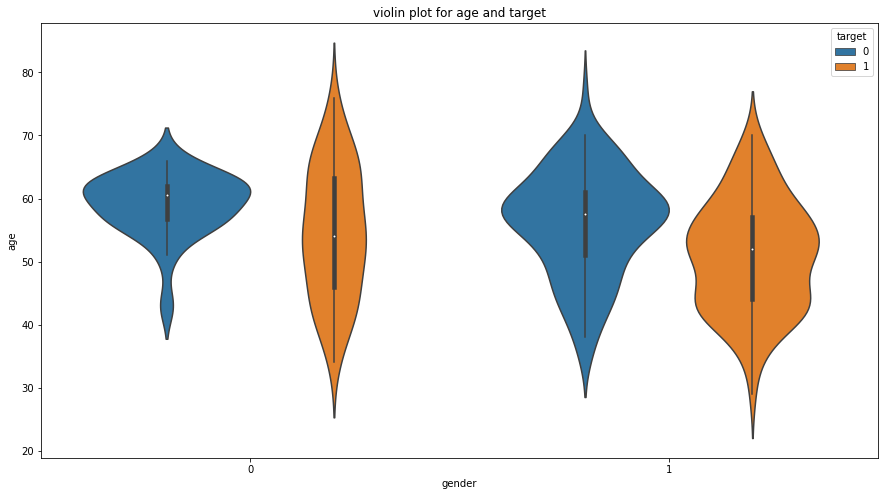

In [14]:
sns.violinplot(x = "gender", y = "age",hue = "target",data = data)
plt.title("violin plot for age and target")
plt.show()

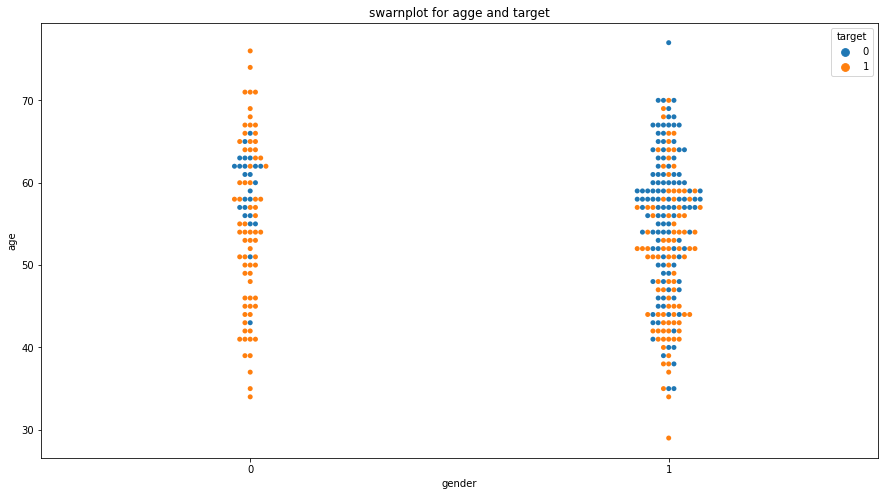

In [15]:
sns.swarmplot(x = "gender",y  = "age",hue = "target",data = data)
plt.title("swarnplot for agge and target")
plt.show()

# gender

In [16]:
data.gender.value_counts()

1    207
0     96
Name: gender, dtype: int64

In [17]:
data.gender.describe()

count    303.000000
mean       0.683168
std        0.466011
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: gender, dtype: float64

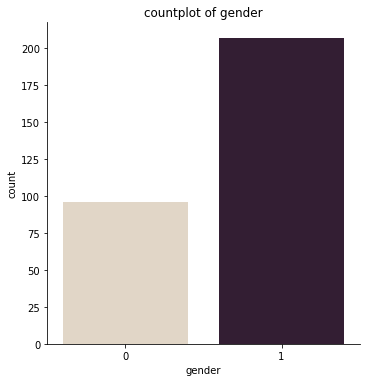

In [18]:
sns.catplot(x="gender", kind="count", palette="ch:.25", data=data)
plt.title("countplot of gender")
plt.show()

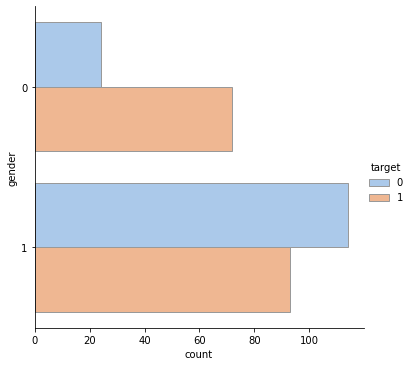

In [19]:
sns.catplot(y ="gender", hue="target", kind="count",
            palette="pastel", edgecolor=".6",
            data=data)

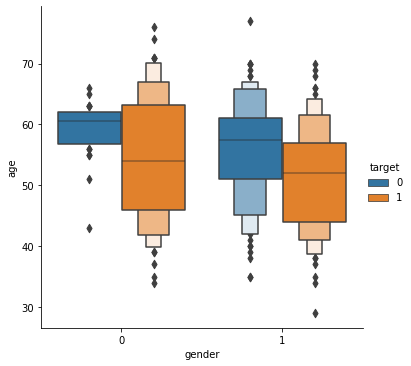

In [20]:
sns.catplot(x="gender", y="age", hue="target", kind="boxen", data=data)
plt.show()

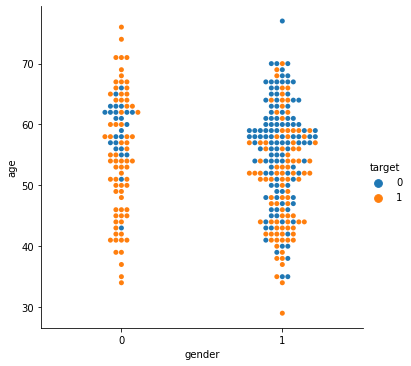

In [21]:
sns.catplot(x="gender", y="age", hue="target", kind="swarm", data=data)
plt.show()

In [22]:
data.groupby("gender")["target"].describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
0,96.0,0.750000,0.435286,0.0,0.75,1.0,1.0,1.0
1,207.0,0.449275,0.498626,0.0,0.00,0.0,1.0,1.0


# chest_pain

In [23]:
data.chest_pain.value_counts()

0    143
2     87
1     50
3     23
Name: chest_pain, dtype: int64

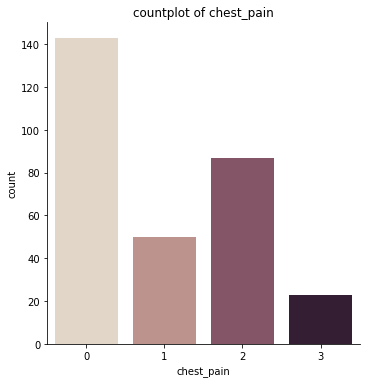

In [24]:
sns.catplot(x="chest_pain", kind="count", palette="ch:.25", data=data)
plt.title("countplot of chest_pain")
plt.show()

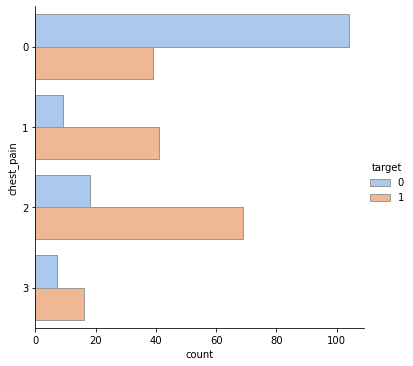

In [25]:
sns.catplot(y ="chest_pain", hue="target", kind="count",
            palette="pastel", edgecolor=".6",
            data=data)
plt.show()

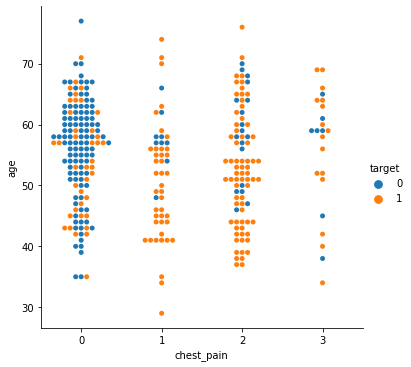

In [26]:
sns.catplot(x="chest_pain", y="age", hue="target", kind="swarm", data=data)
plt.show()

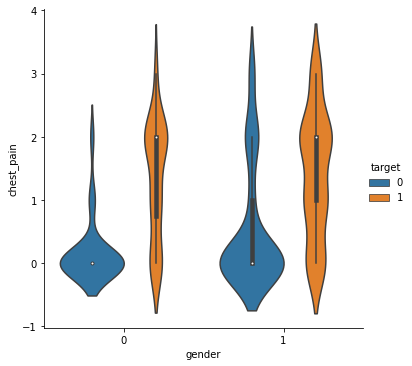

In [27]:
sns.catplot(x="gender", y="chest_pain", hue="target",
            kind="violin", data=data)
plt.show()

In [28]:
data.groupby("chest_pain")["target"].describe()

,count,mean,std,min,25%,50%,75%,max
chest_pain,,,,,,,,
0,143.0,0.272727,0.446927,0.0,0.0,0.0,1.0,1.0
1,50.0,0.820000,0.388088,0.0,1.0,1.0,1.0,1.0
2,87.0,0.793103,0.407429,0.0,1.0,1.0,1.0,1.0
3,23.0,0.695652,0.470472,0.0,0.0,1.0,1.0,1.0


# rest_bps

In [29]:
data.rest_bps.value_counts()

120    37
130    36
140    32
110    19
150    17
138    13
128    12
125    11
160    11
112     9
132     8
118     7
108     6
135     6
124     6
152     5
145     5
134     5
100     4
122     4
170     4
126     3
115     3
105     3
136     3
180     3
142     3
146     2
148     2
178     2
94      2
144     2
102     2
129     1
192     1
101     1
174     1
172     1
104     1
165     1
164     1
106     1
156     1
155     1
154     1
114     1
117     1
123     1
200     1
Name: rest_bps, dtype: int64

In [30]:
data.rest_bps.describe()

count    303.000000
mean     131.623762
std       17.538143
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: rest_bps, dtype: float64

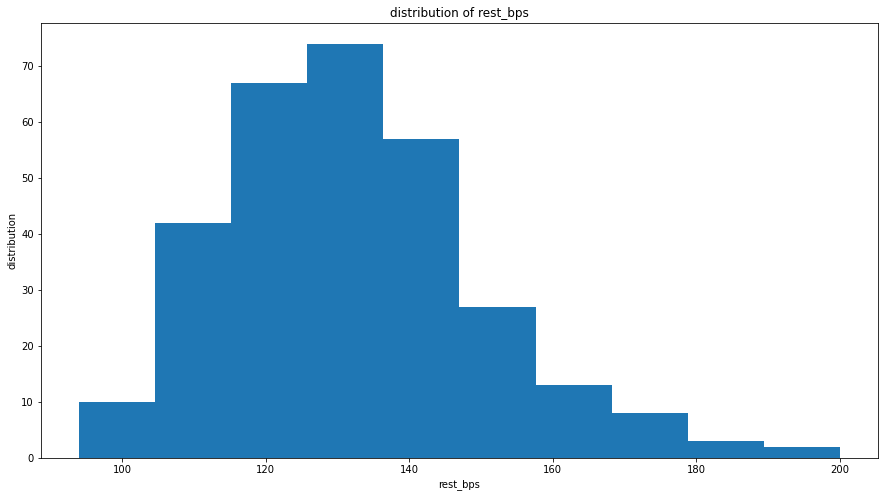

In [31]:
plt.hist(data.rest_bps)
plt.title("distribution of rest_bps")
plt.xlabel("rest_bps")
plt.ylabel("distribution")
plt.show()

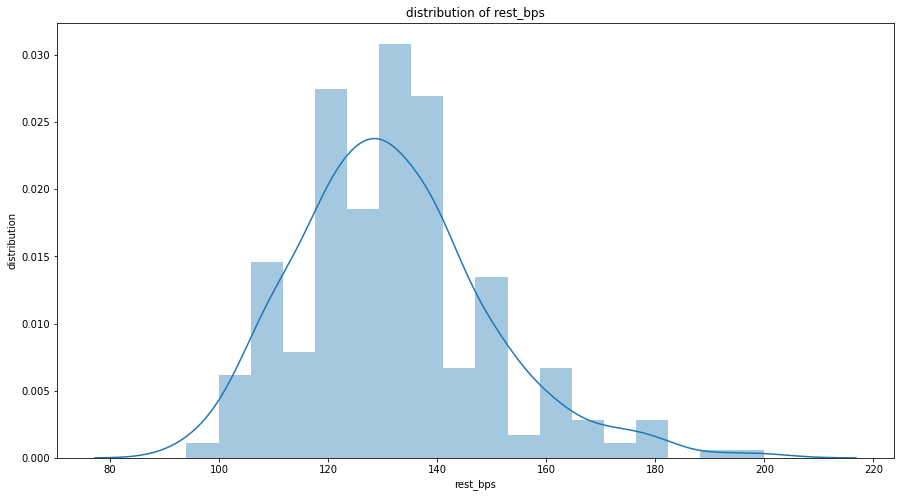

In [32]:
sns.distplot(data.rest_bps)
plt.title("distribution of rest_bps")
plt.xlabel("rest_bps")
plt.ylabel("distribution")
plt.show()

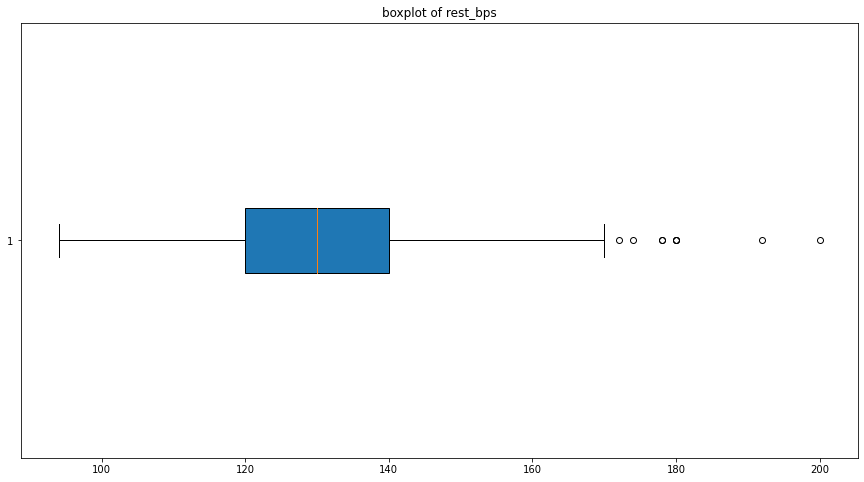

In [33]:
plt.boxplot(data.rest_bps, vert = False,patch_artist = True)
plt.title("boxplot of rest_bps")
plt.show()

In [34]:
IQR = data.rest_bps.quantile(0.75)-data.rest_bps.quantile(0.25)
IQR

20.0

In [35]:
upper_limit= data.rest_bps.quantile(0.75)+ (1.5*IQR)
upper_limit

170.0

In [36]:
lower_limit= data.rest_bps.quantile(0.25)- (1.5*IQR)
lower_limit

90.0

In [37]:
len(data.rest_bps[data.rest_bps>upper_limit])

9

In [38]:
data.groupby("rest_bps")["target"].describe()

,count,mean,std,min,25%,50%,75%,max
rest_bps,,,,,,,,
94,2.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
100,4.0,0.500000,0.577350,0.0,0.00,0.5,1.00,1.0
101,1.0,1.000000,NaN,1.0,1.00,1.0,1.00,1.0
102,2.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
104,1.0,1.000000,NaN,1.0,1.00,1.0,1.00,1.0
105,3.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
106,1.0,1.000000,NaN,1.0,1.00,1.0,1.00,1.0
108,6.0,0.666667,0.516398,0.0,0.25,1.0,1.00,1.0
110,19.0,0.421053,0.507257,0.0,0.00,0.0,1.00,1.0


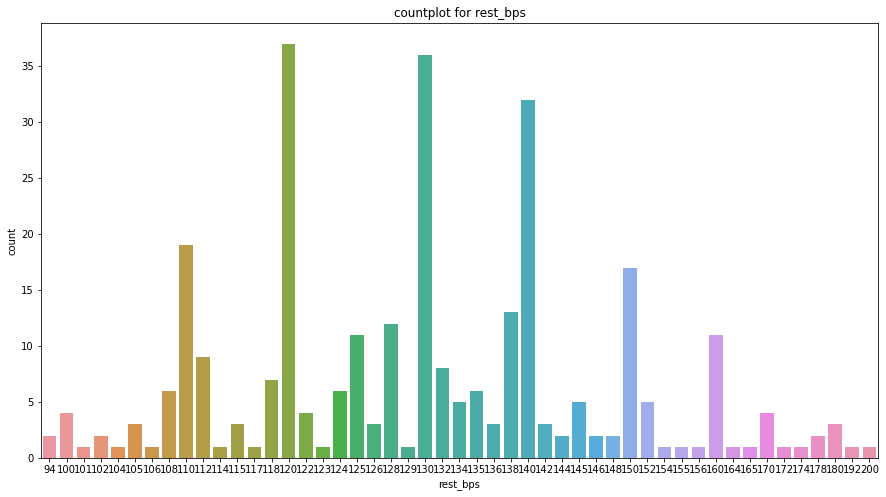

In [39]:
sns.countplot(x ="rest_bps" ,data = data)
plt.title("countplot for rest_bps")
plt.show()

# cholestrol

In [40]:
data.cholestrol.value_counts()

204    6
197    6
234    6
269    5
212    5
      ..
215    1
210    1
200    1
195    1
417    1
Name: cholestrol, Length: 152, dtype: int64

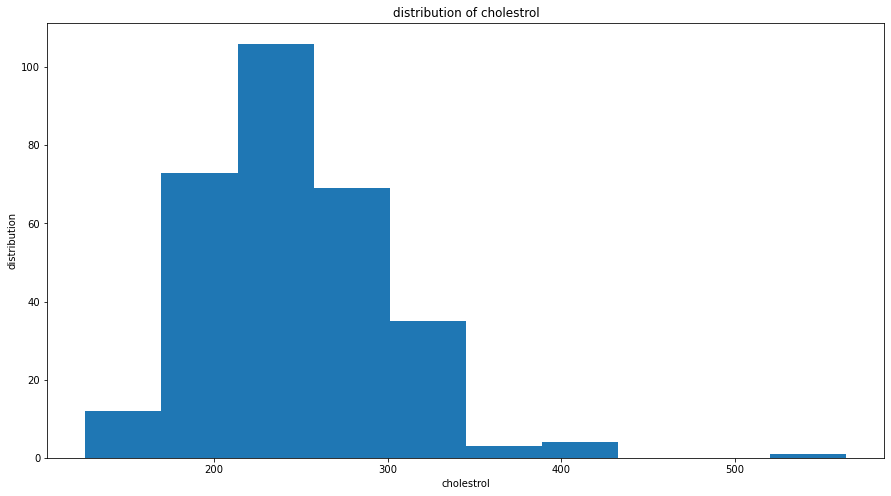

In [41]:
plt.hist(data.cholestrol)
plt.title("distribution of cholestrol")
plt.xlabel("cholestrol")
plt.ylabel("distribution")
plt.show()

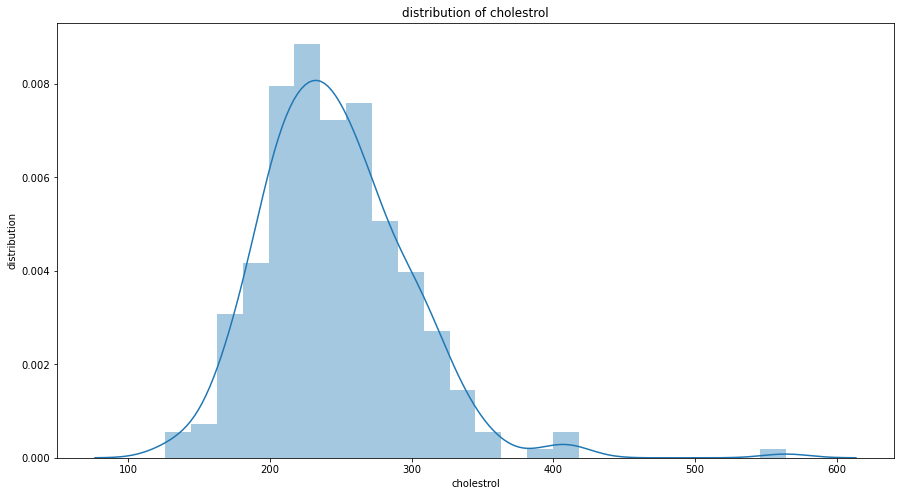

In [42]:
sns.distplot(data.cholestrol)
plt.title("distribution of cholestrol")
plt.xlabel("cholestrol")
plt.ylabel("distribution")
plt.show()

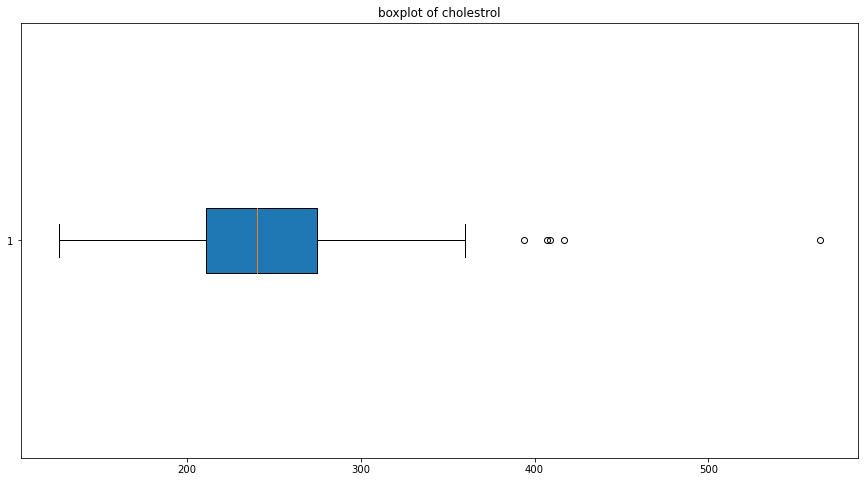

In [43]:
plt.boxplot(data.cholestrol, vert = False,patch_artist = True)
plt.title("boxplot of cholestrol")
plt.show()

In [44]:
IQR = data.cholestrol.quantile(0.75)-data.cholestrol.quantile(0.25)
IQR

63.5

In [45]:
upper_limit= data.cholestrol.quantile(0.75)+ (1.5*IQR)
upper_limit

369.75

In [46]:
lower_limit= data.cholestrol.quantile(0.25)- (1.5*IQR)
lower_limit

115.75

In [47]:
len(data.cholestrol[data.cholestrol>upper_limit])

5

In [48]:
data=data[data['cholestrol']<=510]

In [49]:
data.groupby("cholestrol")["target"].describe()

,count,mean,std,min,25%,50%,75%,max
cholestrol,,,,,,,,
126,1.0,1.0,NaN,1.0,1.00,1.0,1.00,1.0
131,1.0,0.0,NaN,0.0,0.00,0.0,0.00,0.0
141,1.0,1.0,NaN,1.0,1.00,1.0,1.00,1.0
149,2.0,0.5,0.707107,0.0,0.25,0.5,0.75,1.0
157,1.0,1.0,NaN,1.0,1.00,1.0,1.00,1.0
...,...,...,...,...,...,...,...,...
360,1.0,1.0,NaN,1.0,1.00,1.0,1.00,1.0
394,1.0,1.0,NaN,1.0,1.00,1.0,1.00,1.0
407,1.0,0.0,NaN,0.0,0.00,0.0,0.00,0.0


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  302 non-null    int64  
 1   gender               302 non-null    int64  
 2   chest_pain           302 non-null    int64  
 3   rest_bps             302 non-null    int64  
 4   cholestrol           302 non-null    int64  
 5   fasting_blood_sugar  302 non-null    int64  
 6   rest_ecg             302 non-null    int64  
 7   thalach              302 non-null    int64  
 8   exer_angina          302 non-null    int64  
 9   old_peak             302 non-null    float64
 10  slope                302 non-null    int64  
 11  ca                   302 non-null    int64  
 12  thalassemia          302 non-null    int64  
 13  target               302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


# fasting_blood_sugar

In [51]:
data.fasting_blood_sugar.value_counts()

0    257
1     45
Name: fasting_blood_sugar, dtype: int64

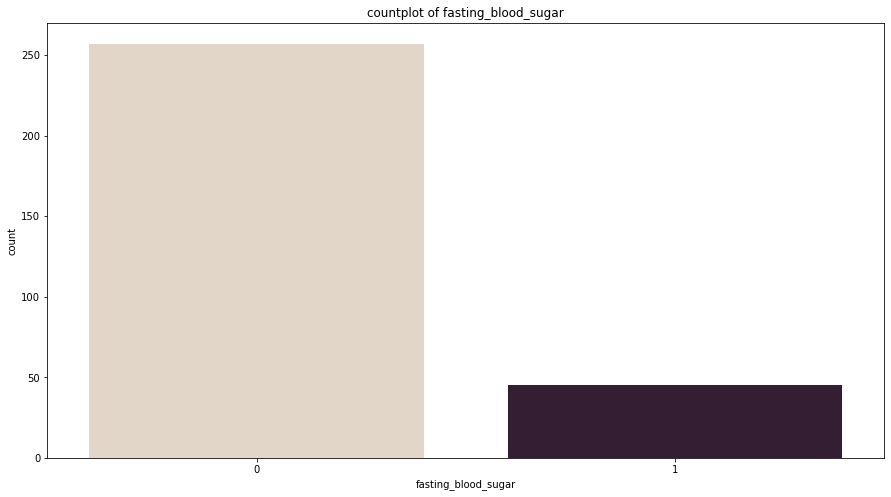

In [52]:
sns.countplot(x="fasting_blood_sugar", palette="ch:.25", data=data)
plt.title("countplot of fasting_blood_sugar")
plt.show()

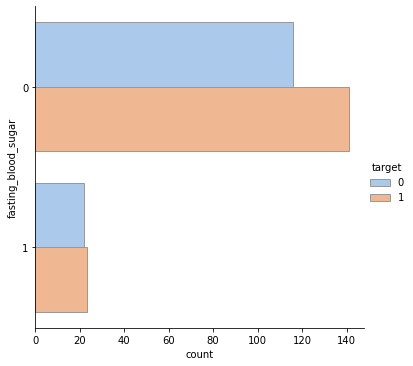

In [53]:
sns.catplot(y ="fasting_blood_sugar", hue="target", kind="count",
            palette="pastel", edgecolor=".6",
            data=data)
plt.show()

In [54]:
data.fasting_blood_sugar.describe()

count    302.000000
mean       0.149007
std        0.356686
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: fasting_blood_sugar, dtype: float64

In [55]:
data.groupby("fasting_blood_sugar")["target"].describe()

,count,mean,std,min,25%,50%,75%,max
fasting_blood_sugar,,,,,,,,
0,257.0,0.548638,0.498600,0.0,0.0,1.0,1.0,1.0
1,45.0,0.511111,0.505525,0.0,0.0,1.0,1.0,1.0


# rest_ecg

In [56]:
data.rest_ecg.value_counts()

1    152
0    146
2      4
Name: rest_ecg, dtype: int64

In [57]:
data.rest_ecg.describe()

count    302.000000
mean       0.529801
std        0.525849
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        2.000000
Name: rest_ecg, dtype: float64

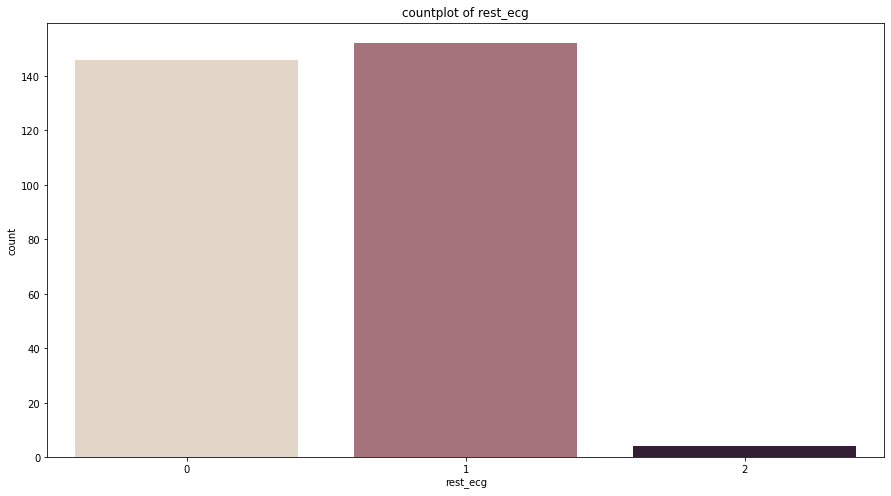

In [58]:
sns.countplot(x="rest_ecg", palette="ch:.25", data=data)
plt.title("countplot of rest_ecg")
plt.show()

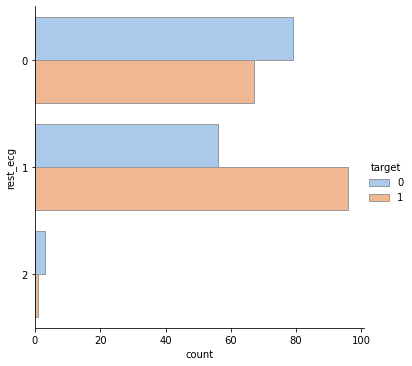

In [59]:
sns.catplot(y ="rest_ecg", hue="target", kind="count",
            palette="pastel", edgecolor=".6",
            data=data)
plt.show()

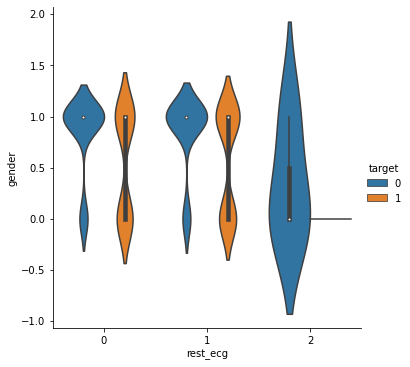

In [60]:
sns.catplot(x="rest_ecg", y="gender", hue="target",
            kind="violin", data=data)
plt.show()

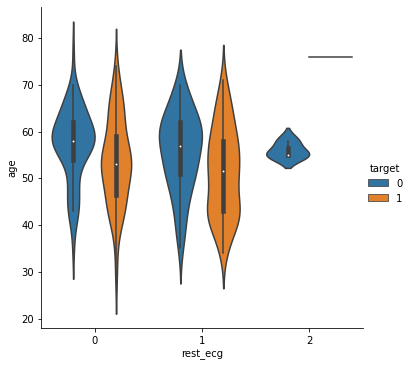

In [61]:
sns.catplot(x="rest_ecg", y="age", hue="target",
            kind="violin", data=data)
plt.show()

In [62]:
data.groupby("rest_ecg")["target"].describe()

,count,mean,std,min,25%,50%,75%,max
rest_ecg,,,,,,,,
0,146.0,0.458904,0.500024,0.0,0.0,0.0,1.00,1.0
1,152.0,0.631579,0.483971,0.0,0.0,1.0,1.00,1.0
2,4.0,0.250000,0.500000,0.0,0.0,0.0,0.25,1.0


# thalach

In [63]:
data.thalach.value_counts()

162    11
163     9
160     8
152     8
173     8
       ..
128     1
129     1
134     1
137     1
202     1
Name: thalach, Length: 91, dtype: int64

In [64]:
data.thalach.describe()

count    302.000000
mean     149.612583
std       22.935390
min       71.000000
25%      133.250000
50%      152.500000
75%      166.000000
max      202.000000
Name: thalach, dtype: float64

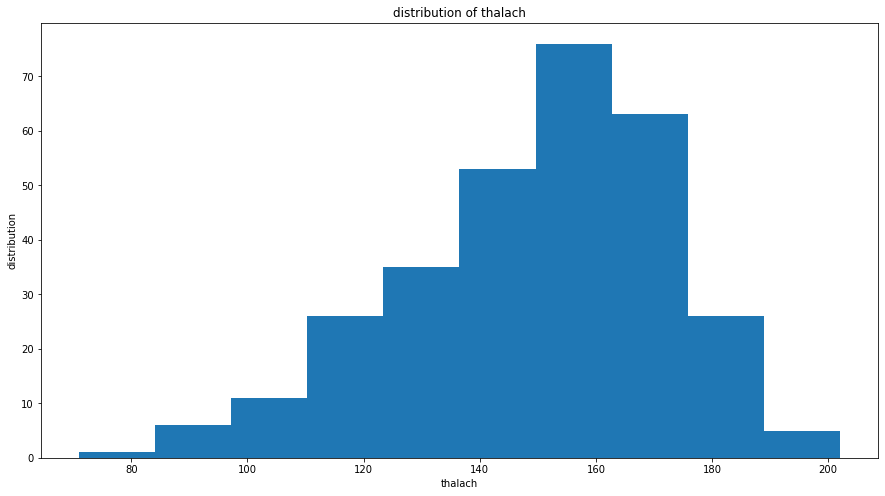

In [65]:
plt.hist(data.thalach)
plt.title("distribution of thalach")
plt.xlabel("thalach")
plt.ylabel("distribution")
plt.show()

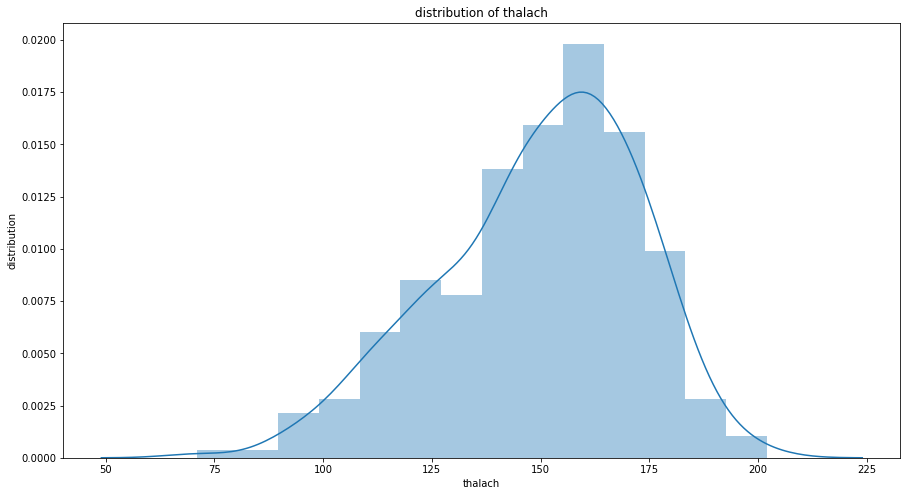

In [66]:
sns.distplot(data.thalach)
plt.title("distribution of thalach")
plt.xlabel("thalach")
plt.ylabel("distribution")
plt.show()

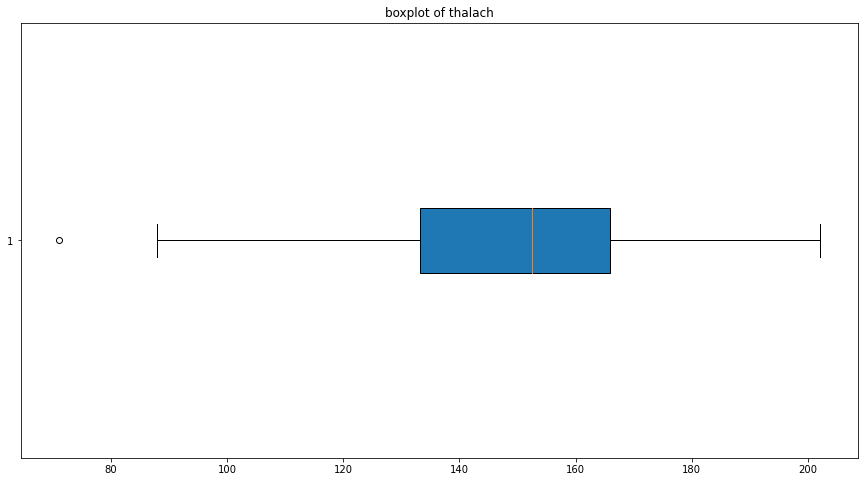

In [67]:
plt.boxplot(data.thalach,vert = False,patch_artist = True)
plt.title("boxplot of thalach")
plt.show()

In [68]:
IQR = data.thalach.quantile(0.75)-data.thalach.quantile(0.25)
IQR

32.75

In [69]:
upper_limit= data.thalach.quantile(0.75)+ (1.5*IQR)
upper_limit

215.125

In [70]:
lower_limit= data.thalach.quantile(0.25)- (1.5*IQR)
lower_limit

84.125

In [71]:
len(data.thalach[data.thalach<lower_limit])

1

In [72]:
data=data[data['thalach']>=80]

In [73]:
data.shape

(301, 14)

# exer_angina

In [74]:
data.exer_angina.value_counts()

0    202
1     99
Name: exer_angina, dtype: int64

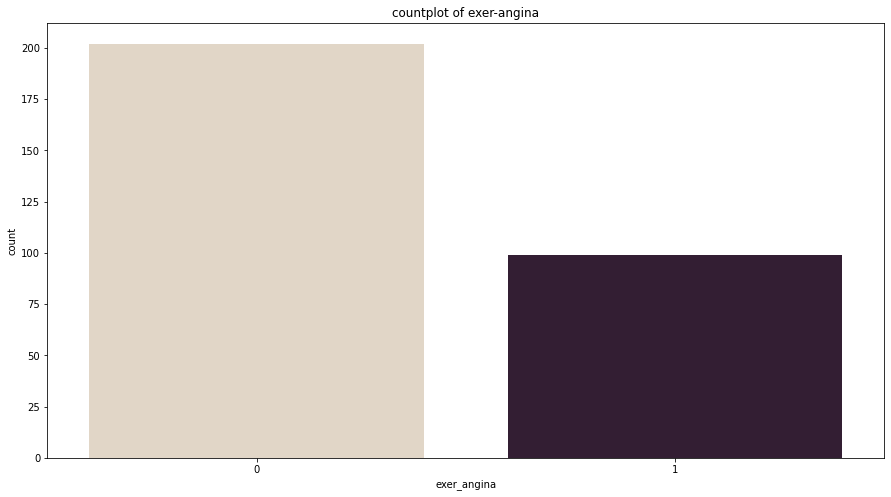

In [75]:
sns.countplot(x="exer_angina", palette="ch:.25", data=data)
plt.title("countplot of exer-angina")
plt.show()

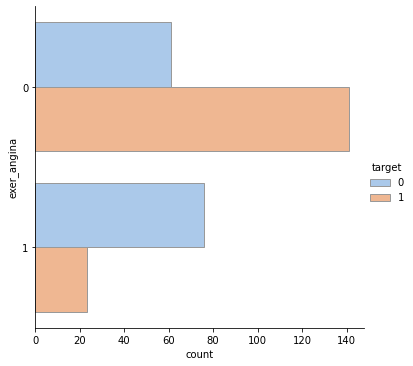

In [76]:
sns.catplot(y ="exer_angina", hue="target", kind="count",
            palette="pastel", edgecolor=".6",
            data=data)
plt.show()

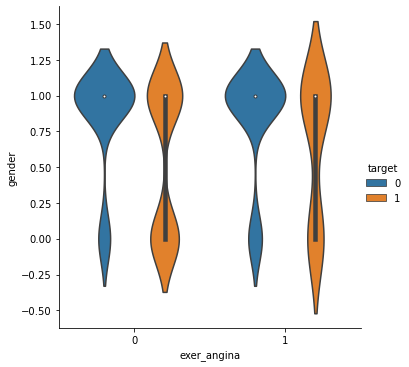

In [77]:
sns.catplot(x="exer_angina", y="gender", hue="target",
            kind="violin", data=data)
plt.show()

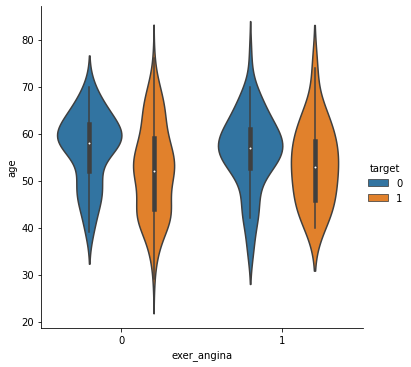

In [78]:
sns.catplot(x="exer_angina", y="age", hue="target",
            kind="violin", data=data)
plt.show()

In [79]:
data.exer_angina.describe()

count    301.000000
mean       0.328904
std        0.470597
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: exer_angina, dtype: float64

In [80]:
data.groupby("exer_angina")["target"].describe()

,count,mean,std,min,25%,50%,75%,max
exer_angina,,,,,,,,
0,202.0,0.698020,0.460257,0.0,0.0,1.0,1.0,1.0
1,99.0,0.232323,0.424463,0.0,0.0,0.0,0.0,1.0


# old_peak

In [81]:
data.old_peak.value_counts()

0.0    99
1.2    17
0.6    14
0.8    13
1.0    13
1.4    13
0.2    12
1.6    10
1.8    10
0.4     9
2.0     9
0.1     7
2.6     6
2.8     6
1.9     5
0.5     5
1.5     5
3.0     5
2.2     4
3.6     4
0.3     3
2.4     3
0.9     3
4.0     3
3.4     3
2.3     2
1.1     2
4.2     2
3.2     2
2.5     2
3.5     1
1.3     1
3.8     1
6.2     1
5.6     1
3.1     1
2.9     1
4.4     1
0.7     1
2.1     1
Name: old_peak, dtype: int64

In [82]:
data.old_peak.describe()

count    301.000000
mean       1.037874
std        1.164486
min        0.000000
25%        0.000000
50%        0.800000
75%        1.600000
max        6.200000
Name: old_peak, dtype: float64

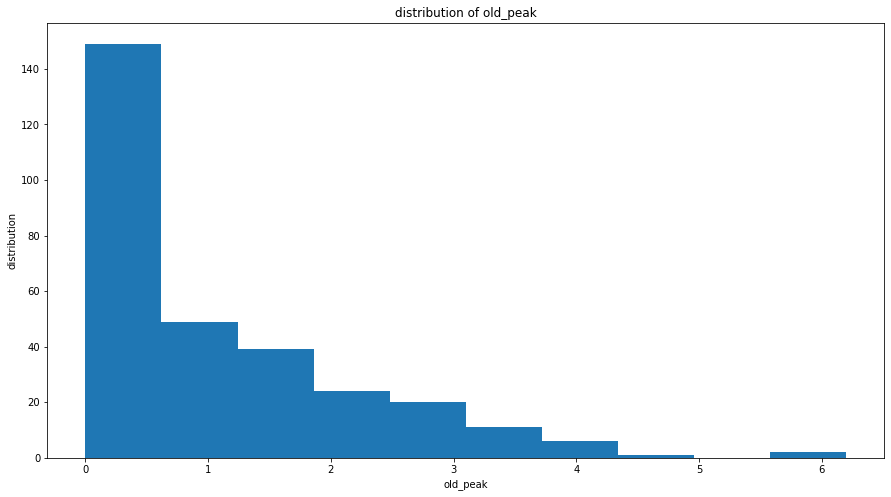

In [83]:
plt.hist(data.old_peak)
plt.title("distribution of old_peak")
plt.xlabel("old_peak")
plt.ylabel("distribution")
plt.show()

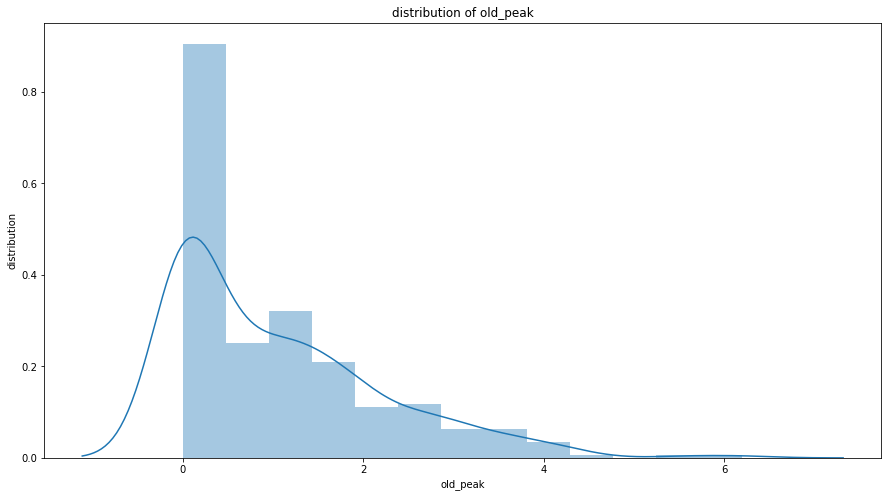

In [84]:
sns.distplot(data.old_peak)
plt.title("distribution of old_peak")
plt.xlabel("old_peak")
plt.ylabel("distribution")
plt.show()

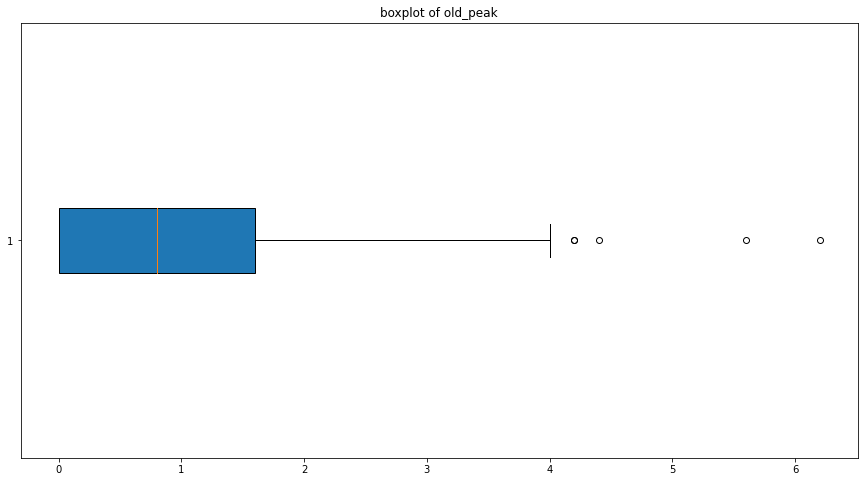

In [85]:
plt.boxplot(data.old_peak, vert = False,patch_artist = True)
plt.title("boxplot of old_peak")
plt.show()

In [86]:
IQR = data.old_peak.quantile(0.75)-data.old_peak.quantile(0.25)
IQR

1.6

In [87]:
upper_limit= data.old_peak.quantile(0.75)+ (1.5*IQR)
upper_limit

4.0

In [88]:
len(data.old_peak[data.old_peak>upper_limit])

5

In [89]:
data=data[data['old_peak']<=5]

In [90]:
data.shape

(299, 14)

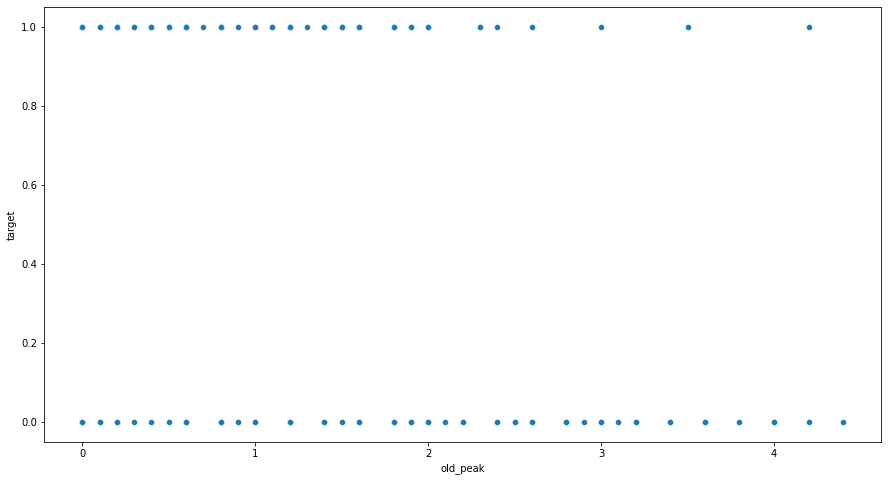

In [91]:
sns.scatterplot(x = "old_peak",y  = "target",data = data)
plt.show()

In [92]:
data.groupby("old_peak")["target"].describe()

,count,mean,std,min,25%,50%,75%,max
old_peak,,,,,,,,
0.0,99.0,0.747475,0.436672,0.0,0.50,1.0,1.00,1.0
0.1,7.0,0.571429,0.534522,0.0,0.00,1.0,1.00,1.0
0.2,12.0,0.750000,0.452267,0.0,0.75,1.0,1.00,1.0
0.3,3.0,0.666667,0.577350,0.0,0.50,1.0,1.00,1.0
0.4,9.0,0.888889,0.333333,0.0,1.00,1.0,1.00,1.0
0.5,5.0,0.800000,0.447214,0.0,1.00,1.0,1.00,1.0
0.6,14.0,0.714286,0.468807,0.0,0.25,1.0,1.00,1.0
0.7,1.0,1.000000,NaN,1.0,1.00,1.0,1.00,1.0
0.8,13.0,0.538462,0.518875,0.0,0.00,1.0,1.00,1.0


# slope

In [93]:
data.slope.value_counts()

2    142
1    138
0     19
Name: slope, dtype: int64

In [94]:
data.slope.describe()

count    299.000000
mean       1.411371
std        0.608666
min        0.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        2.000000
Name: slope, dtype: float64

In [95]:
data.groupby("slope")["target"].describe()

,count,mean,std,min,25%,50%,75%,max
slope,,,,,,,,
0,19.0,0.473684,0.512989,0.0,0.0,0.0,1.0,1.0
1,138.0,0.347826,0.478016,0.0,0.0,0.0,1.0,1.0
2,142.0,0.753521,0.432486,0.0,1.0,1.0,1.0,1.0


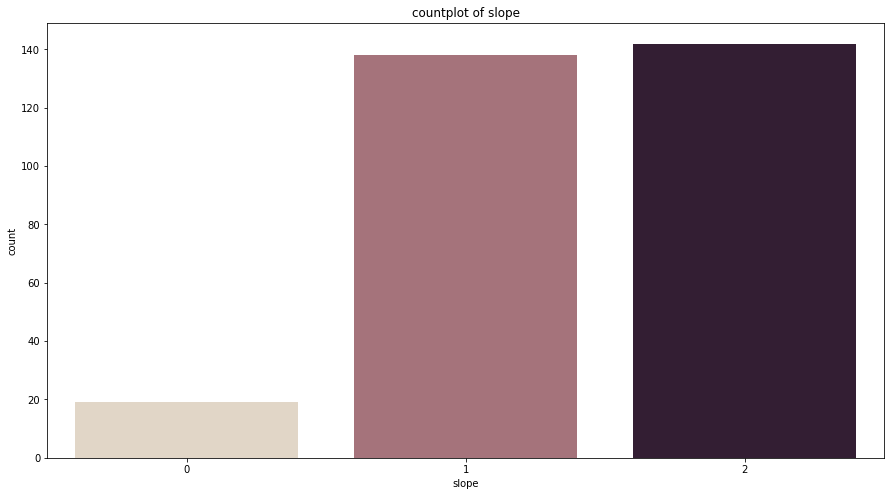

In [96]:
sns.countplot(x="slope", palette="ch:.25", data=data)
plt.title("countplot of slope")
plt.show()

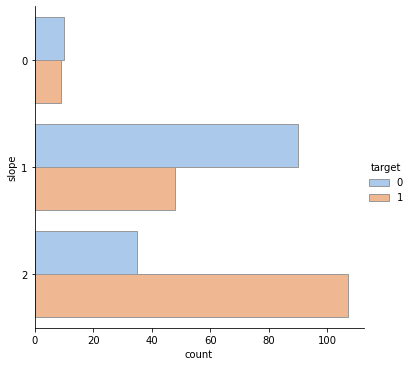

In [97]:
sns.catplot(y ="slope", hue="target", kind="count",
            palette="pastel", edgecolor=".6",
            data=data)
plt.show()

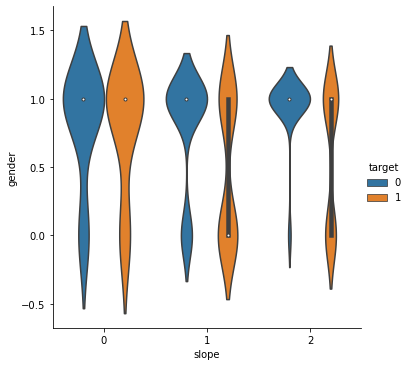

In [98]:
sns.catplot(x="slope", y="gender", hue="target",
            kind="violin", data=data)
plt.show()

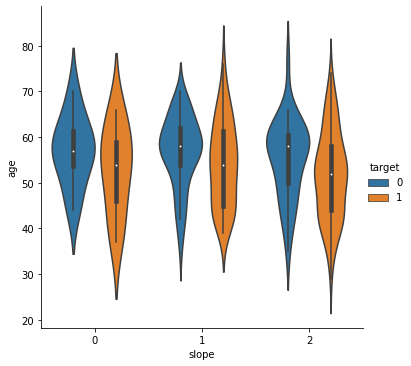

In [99]:
sns.catplot(x="slope", y="age", hue="target",
            kind="violin", data=data)
plt.show()

In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  299 non-null    int64  
 1   gender               299 non-null    int64  
 2   chest_pain           299 non-null    int64  
 3   rest_bps             299 non-null    int64  
 4   cholestrol           299 non-null    int64  
 5   fasting_blood_sugar  299 non-null    int64  
 6   rest_ecg             299 non-null    int64  
 7   thalach              299 non-null    int64  
 8   exer_angina          299 non-null    int64  
 9   old_peak             299 non-null    float64
 10  slope                299 non-null    int64  
 11  ca                   299 non-null    int64  
 12  thalassemia          299 non-null    int64  
 13  target               299 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 43.1 KB


# ca

In [101]:
data.ca.value_counts()

0    172
1     65
2     38
3     19
4      5
Name: ca, dtype: int64

In [102]:
data.ca.describe()

count    299.000000
mean       0.729097
std        1.018383
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        4.000000
Name: ca, dtype: float64

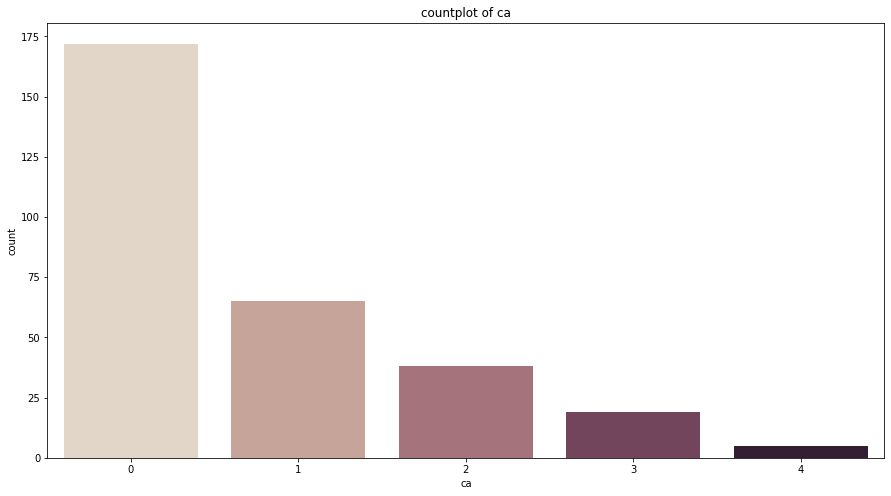

In [103]:
sns.countplot(x="ca", palette="ch:.25", data=data)
plt.title("countplot of ca")
plt.show()

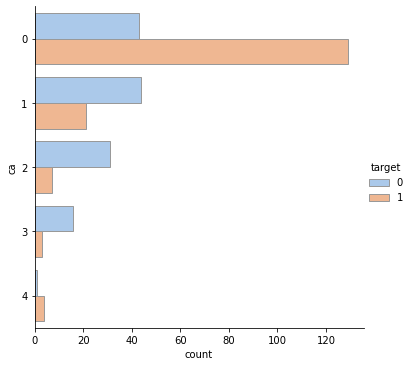

In [104]:
sns.catplot(y ="ca", hue="target", kind="count",
            palette="pastel", edgecolor=".6",
            data=data)
plt.show()

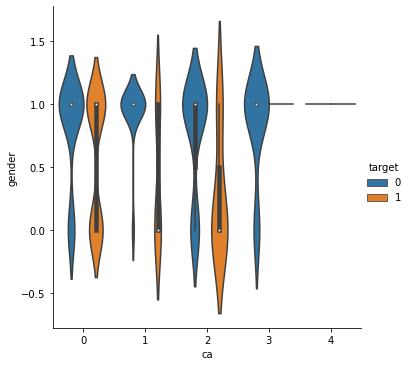

In [105]:
sns.catplot(x="ca", y="gender", hue="target",
            kind="violin", data=data)
plt.show()

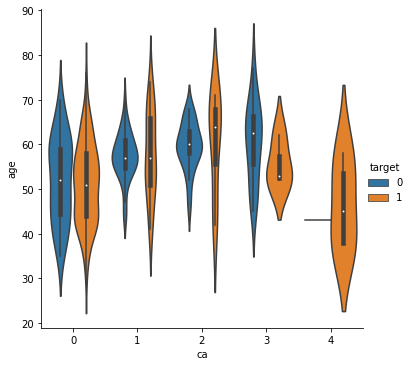

In [106]:
sns.catplot(x="ca", y="age", hue="target",
            kind="violin", data=data)
plt.show()

In [107]:
data.groupby("ca")["target"].describe()

,count,mean,std,min,25%,50%,75%,max
ca,,,,,,,,
0,172.0,0.750000,0.434277,0.0,0.75,1.0,1.0,1.0
1,65.0,0.323077,0.471291,0.0,0.00,0.0,1.0,1.0
2,38.0,0.184211,0.392859,0.0,0.00,0.0,0.0,1.0
3,19.0,0.157895,0.374634,0.0,0.00,0.0,0.0,1.0
4,5.0,0.800000,0.447214,0.0,1.00,1.0,1.0,1.0


# thalassemia

In [108]:
data.thalassemia.value_counts()

2    165
3    114
1     18
0      2
Name: thalassemia, dtype: int64

In [109]:
data.thalassemia.describe()

count    299.000000
mean       2.307692
std        0.612214
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        3.000000
Name: thalassemia, dtype: float64

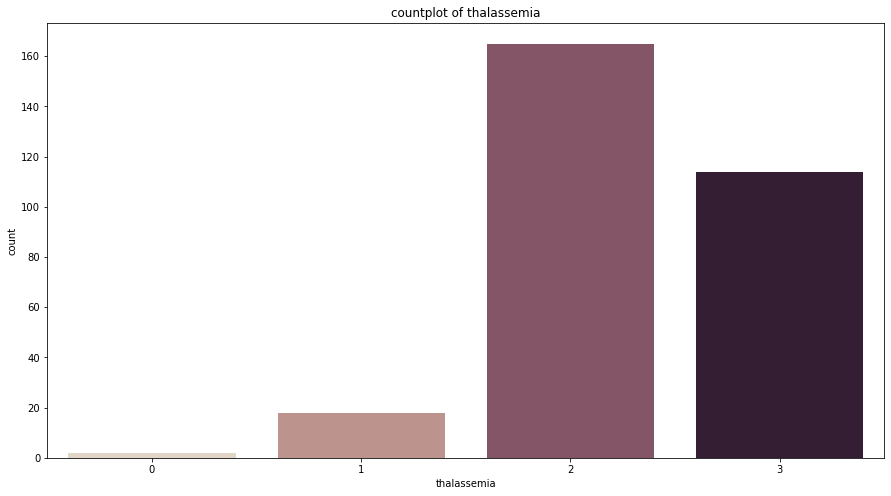

In [110]:
sns.countplot(x="thalassemia", palette="ch:.25", data=data)
plt.title("countplot of thalassemia")
plt.show()

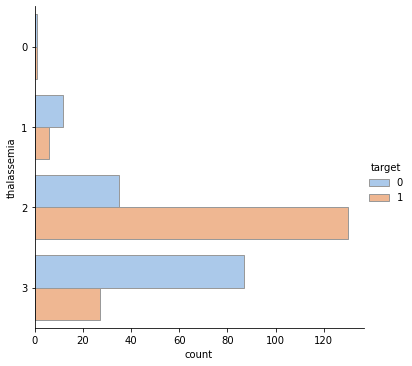

In [111]:
sns.catplot(y ="thalassemia", hue="target", kind="count",
            palette="pastel", edgecolor=".6",
            data=data)
plt.show()

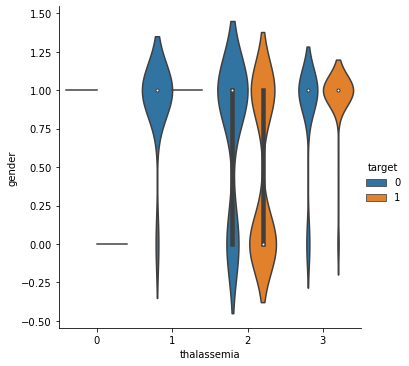

In [112]:
sns.catplot(x="thalassemia", y="gender", hue="target",
            kind="violin", data=data)
plt.show()

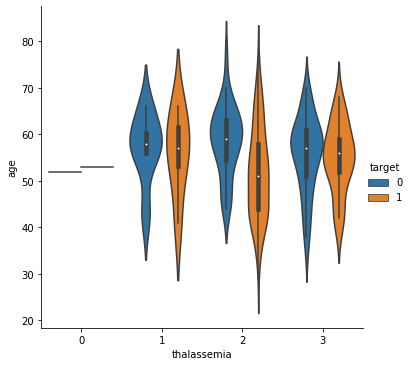

In [113]:
sns.catplot(x="thalassemia", y="age", hue="target",
            kind="violin", data=data)
plt.show()

In [114]:
data.groupby("thalassemia")["target"].describe()

,count,mean,std,min,25%,50%,75%,max
thalassemia,,,,,,,,
0,2.0,0.500000,0.707107,0.0,0.25,0.5,0.75,1.0
1,18.0,0.333333,0.485071,0.0,0.00,0.0,1.00,1.0
2,165.0,0.787879,0.410055,0.0,1.00,1.0,1.00,1.0
3,114.0,0.236842,0.427022,0.0,0.00,0.0,0.00,1.0


# target

In [115]:
data.target.value_counts()

1    164
0    135
Name: target, dtype: int64

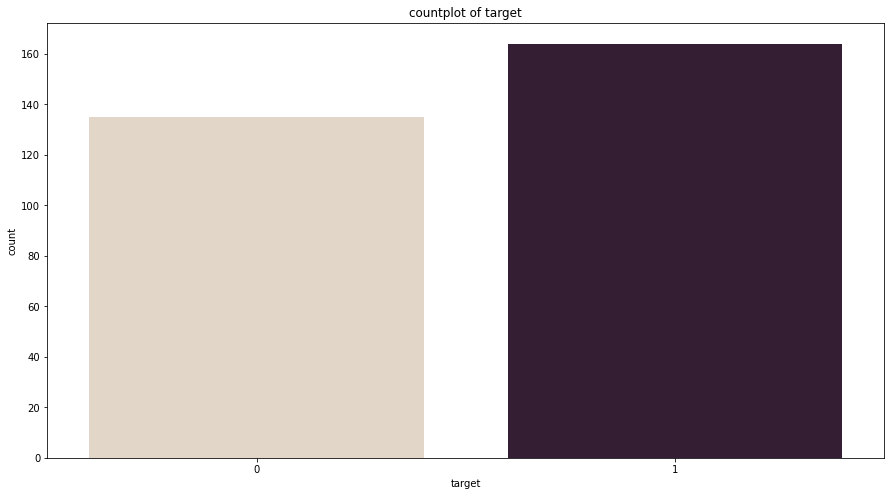

In [116]:
sns.countplot(x="target", palette="ch:.25", data=data)
plt.title("countplot of target")
plt.show()

In [117]:
data.target.describe()

count    299.000000
mean       0.548495
std        0.498477
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [118]:
numeric = data.select_dtypes(include = np.number)
numeric.columns

Index(['age', 'gender', 'chest_pain', 'rest_bps', 'cholestrol',
       'fasting_blood_sugar', 'rest_ecg', 'thalach', 'exer_angina', 'old_peak',
       'slope', 'ca', 'thalassemia', 'target'],
      dtype='object')

In [119]:
categ = data.select_dtypes(include  = "object")
categ.columns

Index([], dtype='object')

In [120]:
data1 = pd.concat([numeric,categ],axis = 1)

In [121]:
x = data1.drop("target",axis = 1)
y = data1["target"]

In [122]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)

In [123]:
y_train

253    0
256    0
183    0
99     1
35     1
      ..
164    1
220    0
68     1
125    1
83     1
Name: target, Length: 209, dtype: int64

In [124]:

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression()

In [125]:
from sklearn.metrics import accuracy_score,classification_report

In [126]:
y_predict=logreg.predict(x_test)
lg=accuracy_score(y_test,y_predict)
lg

0.8555555555555555

In [127]:
pd.crosstab(y_test,y_predict)

col_0,0,1
target,,
0,32,12
1,1,45


In [128]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.97      0.73      0.83        44
           1       0.79      0.98      0.87        46

    accuracy                           0.86        90
   macro avg       0.88      0.85      0.85        90
weighted avg       0.88      0.86      0.85        90



In [129]:
y_predict = logreg.predict_proba(x)
y_predict[:,1]
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

In [130]:
y_test.shape

(90,)

In [131]:
y_predict.shape

(299, 2)

In [132]:
y_train.shape

(209,)

In [133]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

0.9187895212285456


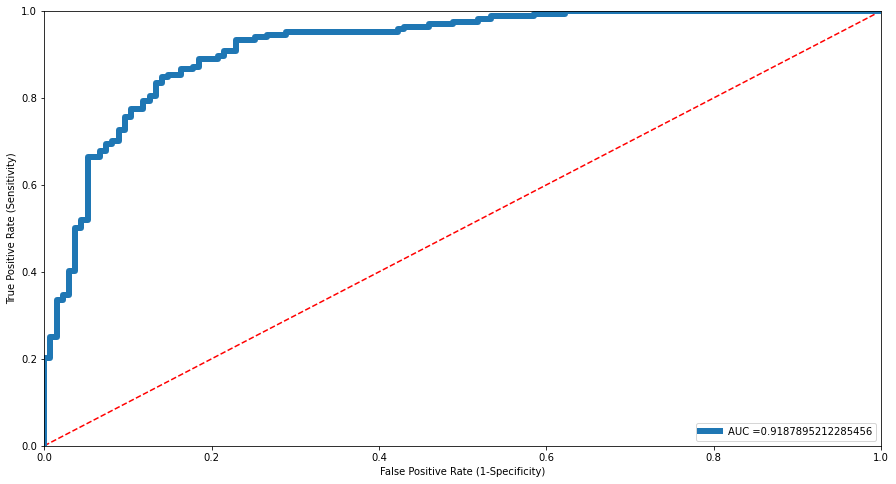

In [134]:

#ROC Curve - Receiver Operating Characteristic curve
#tpr = True Positive Rate 
#fpr = False Positive Rate
from sklearn.metrics import roc_curve, auc, roc_auc_score
fpr, tpr, thresholds =roc_curve(y, y_predict[:,1])
roc_auc = auc(fpr, tpr)

print(roc_auc) # AUC - 0.77plt.title('ROC Curve ')
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.plot(fpr, tpr, label = 'AUC =' + str(roc_auc), lw=6)
plt.legend(loc=4) #Location of label
plt.show()

In [135]:
from sklearn.tree import DecisionTreeClassifier

# decission tree

In [136]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [137]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7222222222222222


In [138]:
from sklearn import tree

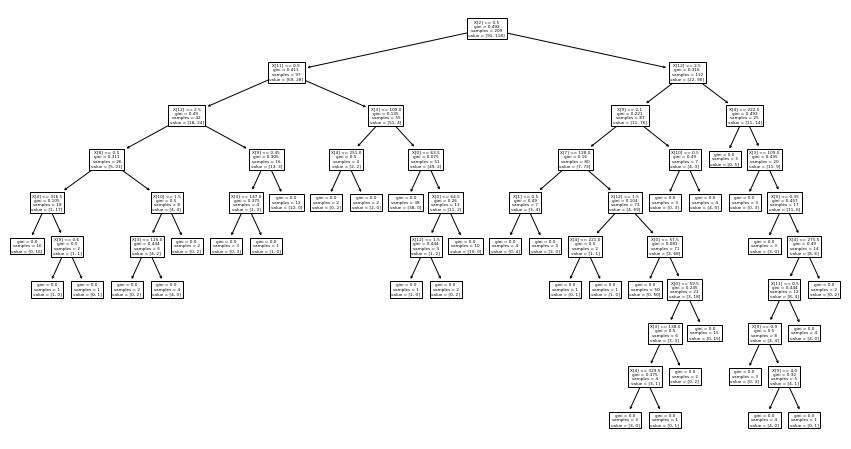

In [139]:
tree.plot_tree(clf)
plt.show()

In [140]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20, random_state = 45)

from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=40)
tree.fit(x_train,y_train)
y_train_pred = tree.predict(x_train)
y_test_pred = tree.predict(x_test)


from sklearn.metrics import accuracy_score

print(round(accuracy_score(y_train,y_train_pred), 2)) #0.96
print(round(accuracy_score(y_test,y_test_pred), 2)) #0.63


1.0
0.63


In [141]:
path = tree.cost_complexity_pruning_path(x_train, y_train)
alphas = path['ccp_alphas']
alphas

array([0.        , 0.00275011, 0.00348675, 0.00380373, 0.00386225,
       0.00401377, 0.0055788 , 0.0055788 , 0.0055788 , 0.0055788 ,
       0.00614678, 0.00627615, 0.00627615, 0.00674162, 0.00711297,
       0.00730557, 0.00812208, 0.01076977, 0.01247846, 0.01577224,
       0.01631799, 0.01993601, 0.02789544, 0.02934542, 0.05218612,
       0.14087774])

In [142]:
accuracy_train, accuracy_test = [],[]
for i in alphas:
    tree=DecisionTreeClassifier(ccp_alpha=i)
    
    tree.fit(x_train, y_train)
    y_train_pred=tree.predict(x_train)
    y_test_pred=tree.predict(x_test)
    
    accuracy_train.append(accuracy_score(y_train, y_train_pred))
    accuracy_test.append(accuracy_score(y_test,y_test_pred))
    

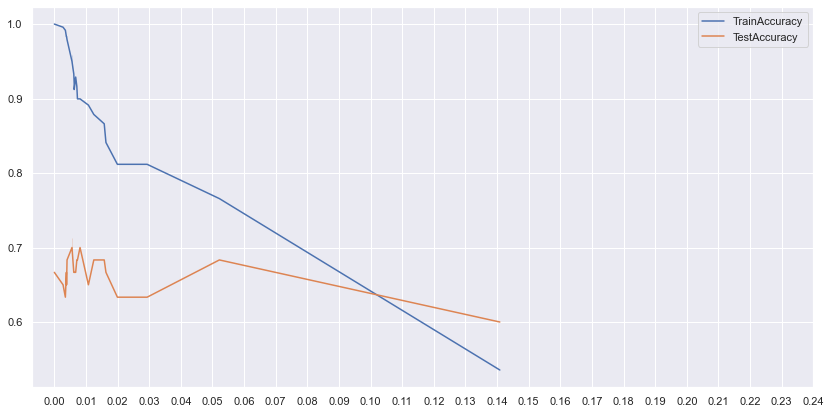

In [143]:
sns.set()
plt.figure(figsize = (14,7))
sns.lineplot(y=accuracy_train, x = alphas, label = 'TrainAccuracy')
sns.lineplot(y=accuracy_test, x = alphas, label = 'TestAccuracy')
plt.xticks(ticks=np.arange(0.00,0.25,0.01))
plt.show()

In [144]:
tree = DecisionTreeClassifier(ccp_alpha=0.02,random_state=40)
tree.fit(x_train,y_train)
y_train_pred = tree.predict(x_train)
y_test_pred = tree.predict(x_test)

from sklearn.metrics import accuracy_score

print(round(accuracy_score(y_train,y_train_pred), 2)) #0.80
print(round(accuracy_score(y_test,y_test_pred), 2)) #0.80
# both 0.80

0.81
0.63


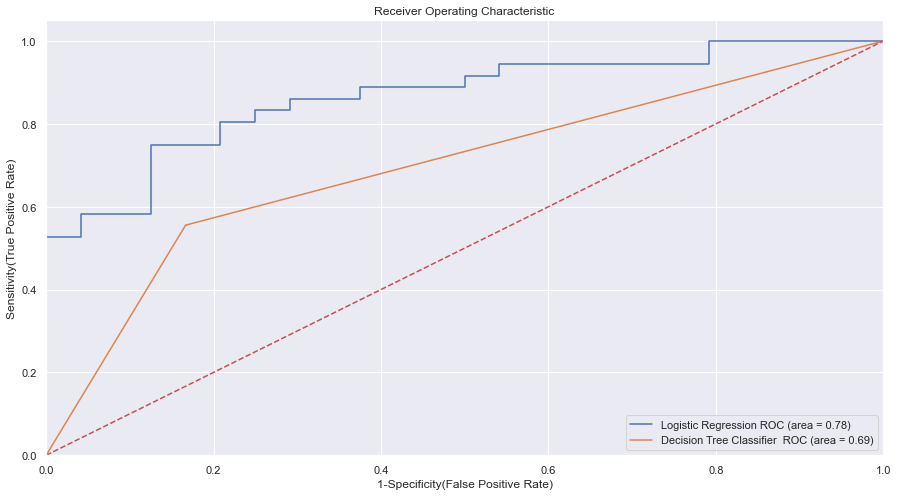

In [159]:
models = [
{
    'label': 'Logistic Regression',
    'model': LogisticRegression(),
},
{
    'label': 'Decision Tree Classifier ',
    'model': DecisionTreeClassifier(),
}
]

for m in models:
    model = m['model'] 
    model.fit(x_train, y_train) 
    y_predict=model.predict(x_test) 
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(x_test)[:,1])
    auc = metrics.roc_auc_score(y_test,model.predict(x_test))
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()